<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#005097; border:0' role="tab" aria-controls="home"><center>Inferência Estatística (GCC1625) - Trabalho 2</center></h1>

- Nome completo: <Vinicius Gonçalves Paraizo Borges>
- [Link para vídeo](<https://youtu.be/6_4gmu0vXBY>)

# (1) Máquina desregulada?

Considere que uma máquina de preenchimento de garrafas está configurada para preencher cada
garrafa com 500 ml de vinho. O fabricante suspeita de que essa máquina está preenchendo
as garrafas com valores a menor. Ele então coleta uma amostra de 20 garrafas preenchidas a
partir da linha de produção e mede cuidadosamente o volume em cada uma delas. Os resultados
obtidos nessas medições estão a seguir (valores em miligramas):
484.11, 459.49, 471.38, 512.01, 494.48, 528.63, 493.64, 485.03, 473.88, 501.59, 502.85, 538.08,
465.68, 495.03, 475.32, 529.41, 518.13, 464.32, 449.08, 489.27


Nessa parte do trabalho você deve verificar a alegação de que a máquina está desregulada,
conforme a suspeita do fabricante.

(i) Os procedimentos paramétricos de testes de hipóteses sobre uma amostra que estudamos
em nosso curso presumem que a amostra a ser usada é proveniente de uma distribuição
aproximadamente normal. Para a amostra fornecida verifique essa hipótese usando dois
dos testes de normalidade que estudamos no curso, o teste de Shapiro-Wilk e o teste
usando QQ-plot. Nessa verificação defina o nível de significância como α = 0.05.

In [15]:
import numpy as np
from scipy.stats import norm

def phi_inversa(amostra, a):
  n = amostra.shape[0]
  i = np.arange(start=1, stop=n+1) # 
  d_i = (i-a)/(n+1-2*a)
  return norm.ppf(d_i)

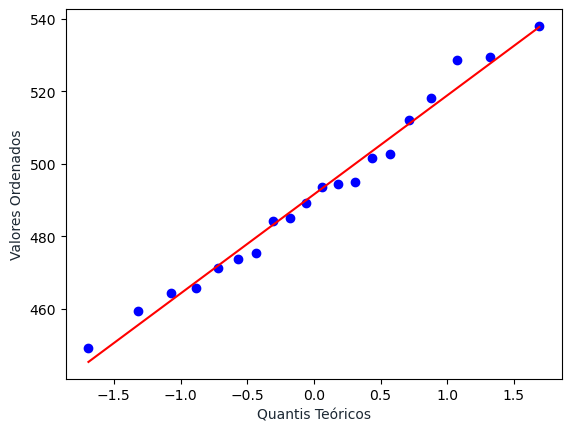

In [17]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np


amostra = np.array([484.11, 459.49, 471.38, 512.01, 494.48, 528.63, 493.64,
                    485.03, 473.88, 501.59, 502.85, 538.08, 465.68, 495.03,
                    475.32, 529.41, 518.13, 464.32, 449.08, 489.27])

amostra = np.sort(amostra)

a = 0.05
x = phi_inversa(amostra, a)

y = amostra

plt.xlabel('Quantis Teóricos', color='#1C2833')
plt.ylabel('Valores Ordenados', color='#1C2833')
plt.plot(x, y, 'o', color='blue')

# ajusta uma reta sobre os pontos da amostra para facilitar a inspeção visual.
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
y = slope * x + intercept
plt.plot(x, y, '-r', label='y=2x+1')
plt.show()

# scipy.stats.probplot(amostra, dist="norm", plot=matplotlib.pyplot)

*Sua explicação aqui:*

O **QQ-plot** é uma ferramenta usada para avaliar se uma amostra segue uma distribuição normal.  
Ele compara os **quantis da amostra** com os **quantis teóricos de uma distribuição normal padrão**.

Para isso, usamos a **função phi-inversa**, que retorna os valores z da normal padrão correspondentes às posições acumuladas da amostra.  
Esses valores são os **quantis teóricos esperados**.

No gráfico, cada ponto representa um valor da amostra versus seu respectivo quantil teórico. O menor valor da amostra é representado pelo menor valor da 'amostra' do quantil teórico e assim em diante.

Se os dados forem aproximadamente normais, os pontos devem se alinhar sobre a linha de referência vermelha.

Como os pontos no nosso gráfico se alinham bem à linha vermelha, temos uma forte indicação de que a distribuição da amostra é aproximadamente normal.

---


In [18]:
import numpy as np
from scipy.stats import shapiro

def apply_normaltest(x):
  k2, p = stats.shapiro(x)
  alpha = .05
  print("valor-p = {:g}".format(p))

  if p < alpha:  # H_0: x é proveniente de uma distribuição normal
    print("A hipótese nula pode ser rejeitada")
  else:
    print("A hipótese nula pode NÃO ser rejeitada")

amostra = np.array([484.11, 459.49, 471.38, 512.01, 494.48, 528.63, 493.64,
                    485.03, 473.88, 501.59, 502.85, 538.08, 465.68, 495.03,
                    475.32, 529.41, 518.13, 464.32, 449.08, 489.27])

apply_normaltest(amostra)

# Se o valor-p for menor que α (0.05): Rejeitamos H0 = a amostra provavelmente não é normal
# Se o valor-p for maior que α (0.05): Não rejeitamos H0 = não temos evidência contra a normalidade.

valor-p = 0.822327
A hipótese nula pode NÃO ser rejeitada


*Sua explicação aqui:*

- **H₀**: A amostra segue uma distribuição normal.  
- **H₁**: A amostra não segue uma distribuição normal.  

---

Se o valor-p for menor que α (0.05): Rejeitamos H₀ = a amostra provavelmente não é normal.

Se o valor-p for maior que α (0.05): Não rejeitamos H₀ = não temos evidência contra a normalidade.

---

Neste caso, valor-p = 0.8223. Logo, NÃO rejeitamos H₀ = não temos evidência contra a normalidade.

---


(ii) Agora, aplique o teste de hipóteses. Repare que a variância da população é desconhecida;
sendo assim, certifique-se de usar o procedimento de teste de hipóteses adequado para
essa situação. Apresente sua análise para o nível de significância igual a 1%. Apresente
e descreva claramente a aplicação dos quatro passos do procedimento.

In [19]:
import numpy as np
from scipy.stats import norm

alpha = 0.01 # nível de significância de 1%
mu_0 = 500
amostra = np.array([484.11, 459.49, 471.38, 512.01, 494.48, 528.63, 493.64,
                    485.03, 473.88, 501.59, 502.85, 538.08, 465.68, 495.03,
                    475.32, 529.41, 518.13, 464.32, 449.08, 489.27])

x_bar = np.mean(amostra)

# desvio padrão da amostra
sigma = (amostra.std())

# Calcular a estatística do teste
z_score = (x_bar-mu_0)/(sigma/np.sqrt(len(amostra)))

# Computar o p-valor (teste unicaudal à esquerda)
p_value = norm.cdf(z_score)

# Interpretar o resultado
if p_value < alpha:
    print("Há evidência para rejeitar a hipótese nula.")
    print(f'p_value: {p_value:.4f} menor que alpha: {alpha}')
else:
    print("Não há evidência para rejeitar a hipótese nula.")
    print(f'p_value: {p_value:.4f} maior que alpha: {alpha}')


Não há evidência para rejeitar a hipótese nula.
p_value: 0.0594 maior que alpha: 0.01


*Sua explicação aqui:*

Os 4 passos do procedimento a seguir:

1. Formular as hipóteses nula e alternativa

- **H₀**: A máquina está preenchendo as garrafas com exatamente **500 ml**.  
- **H₁**: A máquina está preenchendo as garrafas com **menos que 500 ml**.

Este é um teste **unilateral à esquerda**.

---

2. Computar a estatística de teste (test statistic)

Utilizamos o **teste Z**, com média e desvio padrão estimados da amostra.


---


3. Computar o p-valor (p-value)

`norm.cdf(z_score)`


---


4. Interpretar e declarar o resultado

Como o p-valor é maior do que alpha, a hipótese nula NÃO pode ser descartada. Não é significativo estatisticamente para conseguirmos contrariar **H₀**.

---

# (2) Um estilo diferente ajuda?

O conjunto de dados fornecido no arquivo golfe.csv lista as pontuações de uma rodada para 75
membros selecionados aleatoriamente em um campo de golfe, primeiro usando seus próprios
tacos originais e, dois meses depois, usando novos tacos com um estilo (design) experimental.
Queremos verificar a alegação de que esse novo estilo de taco ajuda no desempenho dos
jogadores.

(i) Os procedimentos paramétricos de testes de hipóteses sobre duas amostras que estudamos
em nosso curso presumem que as amostras a serem usadas são provenientes de uma
distribuição aproximadamente normal. Para cada uma das amostras fornecidas, verifique
essa hipótese usando dois dos testes de normalidades que estudamos no curso. Para isso,
use um nível de significância igual a 5%.

In [23]:
import pandas as pd

golfe_path = "golfe.csv"

df = pd.read_csv(golfe_path, index_col='ID ', header=0 ,delimiter=';')


print(df.head())

     Old Score  New Score 
ID                        
1           81          82
2           72          72
3           77          74
4           74          72
5           78          78


In [24]:
from scipy.stats import shapiro

def apply_normaltest(x):
  k2, p = shapiro(x)
  alpha = .05
  print("valor-p = {:g}".format(p))

  if p < alpha:  # H_0: x é proveniente de uma distribuição normal
    print("A hipótese nula pode ser rejeitada. A amostra provavelmente NÃO é normal.")
  else:
    print("A hipótese nula pode NÃO ser rejeitada. A amostra provavelmente é normal.")

amostra_0 = df['Old Score'] # antes
amostra_1 = df['New Score '] # depois


print('Amostra 0:')
apply_normaltest(amostra_0)

print('\nAmostra 1:')
apply_normaltest(amostra_1)

# Se o valor-p for menor que α (0.05): Rejeitamos H0 = a amostra provavelmente não é normal
# Se o valor-p for maior que α (0.05): Não rejeitamos H0 = não temos evidência contra a normalidade.

Amostra 0:
valor-p = 2.26763e-05
A hipótese nula pode ser rejeitada. A amostra provavelmente NÃO é normal.

Amostra 1:
valor-p = 0.000138904
A hipótese nula pode ser rejeitada. A amostra provavelmente NÃO é normal.


In [25]:
import numpy as np
from scipy.stats import normaltest

def apply_normaltest(x):
  k2, p = normaltest(x)
  alpha = .05
  print("p = {:g}".format(p))

  if p < alpha:  # H_0: x é proveniente de uma distribuição normal
    print("A hipótese nula pode ser rejeitada. A amostra provavelmente NÃO é normal.")
  else:
    print("A hipótese nula pode NÃO ser rejeitada. A amostra provavelmente é normal.")

amostra_0 = df['Old Score'] # antes
amostra_1 = df['New Score '] # depois

print('Amostra 0: ')
apply_normaltest(amostra_0)
print('\nAmostra 1:')
apply_normaltest(amostra_1)

Amostra 0: 
p = 1.4234e-06
A hipótese nula pode ser rejeitada. A amostra provavelmente NÃO é normal.

Amostra 1:
p = 0.000551341
A hipótese nula pode ser rejeitada. A amostra provavelmente NÃO é normal.


*Sua explicação aqui:*

Para ambos os testes:
- **H₀**: A amostra segue uma distribuição normal.  
- **H₁**: A amostra não segue uma distribuição normal.

No nosso caso, para ambos os testes, a hipótese nula pôde ser rejeitada. Há um indicio estatístico significativo para descartá-la, dado o seu valor-p calculado sendo muito abaixo de alpha = 0.05.

1. teste shapiro-wilk:

Amostra 'Old Score':
valor-p = **2.26763e-05**
A hipótese nula pode ser rejeitada. A amostra provavelmente NÃO é normal.

Amostra 'New Score':
valor-p = **0.000138904**
A hipótese nula pode ser rejeitada. A amostra provavelmente NÃO é normal.

2. teste D'agostino:

Amostra 0: 
p = **1.4234e-06**
A hipótese nula pode ser rejeitada. A amostra provavelmente NÃO é normal.

Amostra 1:
p = **0.000551341**
A hipótese nula pode ser rejeitada. A amostra provavelmente NÃO é normal.



---

(ii) Agora, aplique o teste de hipóteses propriamente dito. Apresente e descreva claramente
a aplicação dos quatro passos do procedimento. Repare que a variância da população
não é conhecida. Sendo assim, certifique-se de usar o teste de hipóteses adequado para
essa situação. Apresente sua análise para o nível de significância igual a 1%.

In [28]:
import numpy as np
from scipy.stats import t

alpha = 0.01

amostra_0 = df['Old Score'] # antes
amostra_1 = df['New Score '] # depois

delta = amostra_0 - amostra_1

n = delta.shape[0]
if n > 30:
    print("tamanho da amostra > 30!\nn: %d" % n)

nu = n - 1

# estatística usada: t-score
mu_d = 0

x_bar_d = np.mean(delta)
s_d = np.std(delta, ddof=1)

print("Média das diferenças: %.4f." % x_bar_d)
print("Desvio padrão das diferenças: %.4f." % s_d)

t_d = (x_bar_d - mu_d)/(s_d/np.sqrt(n))

print("Valor do t-escore: %.2f" % t_d)

# repare que é um teste bicaudal, logo multiplicamos por 2
pvalue = 2 * t.cdf(-t_d, df=nu)

print("p-value: %.4f\n" % pvalue)

# Interpretar o resultado
if pvalue < alpha:
    print("Há evidência para rejeitar a hipótese nula.")
    print(f'p_value: {pvalue:.4f} menor que alpha: {alpha}')
else:
    print("Não há evidência para rejeitar a hipótese nula.")
    print(f'p_value: {pvalue:.4f} maior que alpha: {alpha}')

tamanho da amostra > 30!
n: 75
Média das diferenças: 2.1333.
Desvio padrão das diferenças: 2.6678.
Valor do t-escore: 6.93
p-value: 0.0000

Há evidência para rejeitar a hipótese nula.
p_value: 0.0000 menor que alpha: 0.01


*Sua explicação aqui:*

Os 4 passos do procedimento a seguir:

1. Formular as hipóteses nula e alternativa

- **H₀**: O escore médio dos golfistas atual continua igual ao do passado (mu_d = 0). Ou seja, média da diferença entre o escore antigo e o novo igual a zero.
- **H₁**: O escore médio dos golfistas atual não continua igual (mu_d != 0).

Este é um teste **bilateral**.

---

2. Computar a estatística de teste (test statistic)

Utilizamos o **teste t pareado**, visto que n>30. Média e desvio padrão estimados da amostra.


---


3. Computar o p-valor (p-value)

Como é bilateral, podendo a diferença ser positiva ou negativa, multiplicamos por 2.

`pvalue = 2 * t.cdf(-t_d, df=nu)`


---


4. Interpretar e declarar o resultado

Como o p-valor é menor do que alpha, a hipótese nula PODE ser descartada. É significativo estatisticamente para conseguirmos contrariar **H₀**. Logo, podemos dizer que houve melhoria com a utilização dos tacos especiais, dado um nível de significância de 1%.


---

# (3) Transmissões: automática versus manual

O conjunto de dados mtcars apresenta informações sobre modelos de carros. Esse conjunto
de dados contém várias variáveis. Entretanto para essa parte do trabalho, duas delas são
relevantes:

• am - essa variável categórica indica o tipo de sistema de transmissão usado no modelo
de automóvel (0 = automatic, 1 = manual). Com base nessa variável, podemos formar
duas amostras independentes: veículos com transmissão automática e veículos com
transmissão manual.

• mpg (miles per gallon) — variável quantitativa contínua que mede o consumo de combustível,
indicando quantas milhas o veículo percorre por galão de combustível. Valores
maiores indicam maior eficiência energética.
Utilizando essas informações, responda aos itens a seguir com base nos métodos estudados
em aula.

(i) Realize uma análise gráfica exploratória comparando o consumo médio de combustível
dos dois grupos de veículos. Utilize ao menos dois tipos de gráfico (como boxplots e
histogramas sobrepostos) e comente os padrões observados.

In [29]:
import pandas as pd

filepath = 'mtcars.csv'

df_completo = pd.read_csv(filepath, header=0)

data = df_completo[['mpg','am']]

C:\Users\parai\AppData\Local\Temp\ipykernel_22872\2097368763.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transmission'] = data['am'].map({0: 'Automatic', 1: 'Manual'})


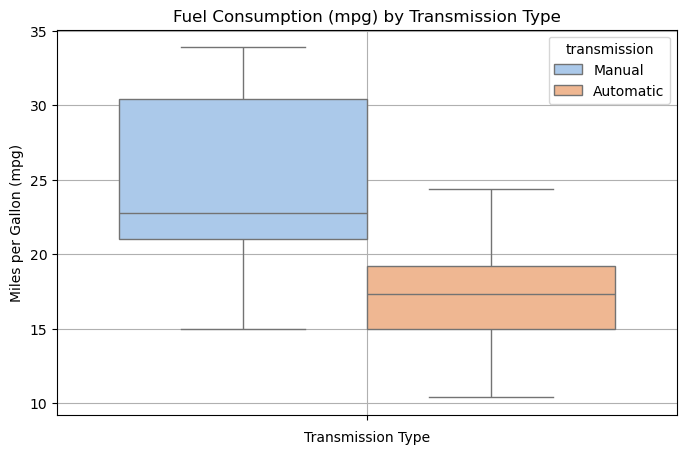

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

data['transmission'] = data['am'].map({0: 'Automatic', 1: 'Manual'})

plt.figure(figsize=(8, 5))
sns.boxplot(hue='transmission', y='mpg', data=data, palette='pastel')
plt.title('Fuel Consumption (mpg) by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Miles per Gallon (mpg)')
plt.grid(True)
plt.show()

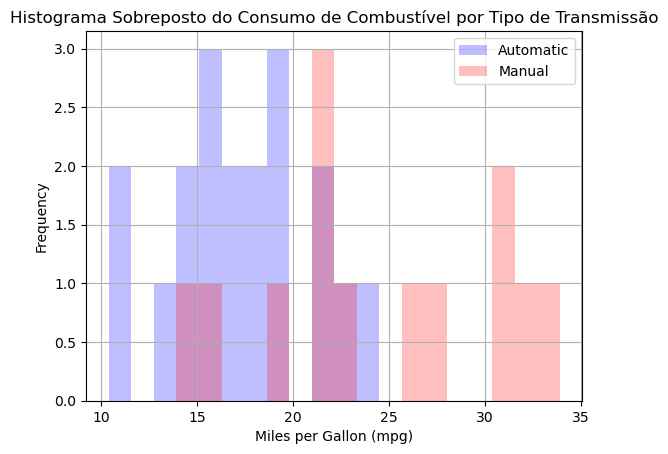

In [36]:
import numpy as np

# Separar os dados por tipo de transmissão 
auto = data[data['am'] == 0]['mpg']
manual = data[data['am'] == 1]['mpg']


# Combinar para encontrar um intervalo de bins comum
combined = np.concatenate([auto, manual])

# Definir bins em COMUM
bins = np.histogram_bin_edges(combined, bins=20)

# automatico
plt.hist(auto, bins=bins, color=(0, 0, 1, 0.25), label='Automatic')

# manual
plt.hist(manual, bins=bins, color=(1, 0, 0, 0.25), label='Manual')

plt.title('Histograma Sobreposto do Consumo de Combustível por Tipo de Transmissão')
plt.xlabel('Miles per Gallon (mpg)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

*Sua explicação aqui:*

De uma maneira geral, ao observamos os 2 gráficos, perce-be que os carros manuais possuem um consumo de combustível menor, sob a perspectiva do mpg.

No boxplot, vemos que o 3o quartil de 'mpg' para Automático está abaixo do 1o quartil para o Manual.

No histograma, vemos que as barras em vermemlho (manual) se concentram mais para a direita, enquanto os que estão em azul (automático) se concentram mais para a esquerda.

---

(ii) Os procedimentos paramétricos de testes de hipóteses sobre duas amostras que estudamos
em nosso curso presumem que as amostras a serem usadas são provenientes de uma
distribuição aproximadamente normal. Para cada uma das amostras fornecidas, verifique
essa hipótese usando dois dos testes de normalidades que estudamos no curso. Para isso,
use um nível de significância igual a 5%.

In [37]:
from scipy.stats import shapiro

def apply_normaltest(x):
  k2, p = shapiro(x)
  alpha = .05
  print("valor-p = {:g}".format(p))

  if p < alpha:  # H_0: x é proveniente de uma distribuição normal
    print("A hipótese nula pode ser rejeitada. A amostra provavelmente NÃO é normal.")
  else:
    print("A hipótese nula pode NÃO ser rejeitada. A amostra provavelmente é normal.")



grupo_auto = data[data['am'] == 0]['mpg']

grupo_manual = data[data['am'] == 1]['mpg']


print('Amostra de mpg para automáticos (0):')
apply_normaltest(grupo_auto)

print('\nAmostra de mpg para manuais (1):')
apply_normaltest(grupo_manual)

# Se o valor-p for menor que α (0.05): Rejeitamos H0 = a amostra provavelmente não é normal
# Se o valor-p for maior que α (0.05): Não rejeitamos H0 = não temos evidência contra a normalidade.

Amostra de mpg para automáticos (0):
valor-p = 0.898736
A hipótese nula pode NÃO ser rejeitada. A amostra provavelmente é normal.

Amostra de mpg para manuais (1):
valor-p = 0.536273
A hipótese nula pode NÃO ser rejeitada. A amostra provavelmente é normal.


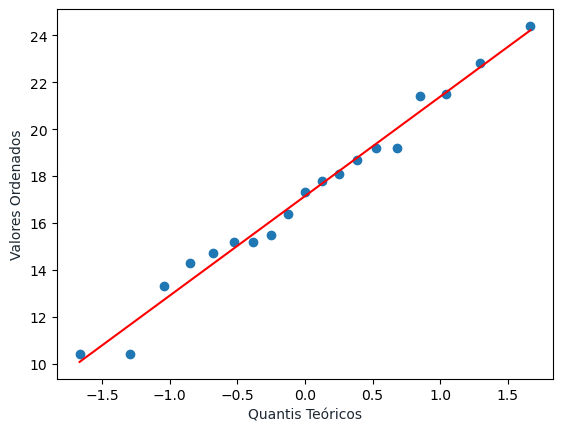

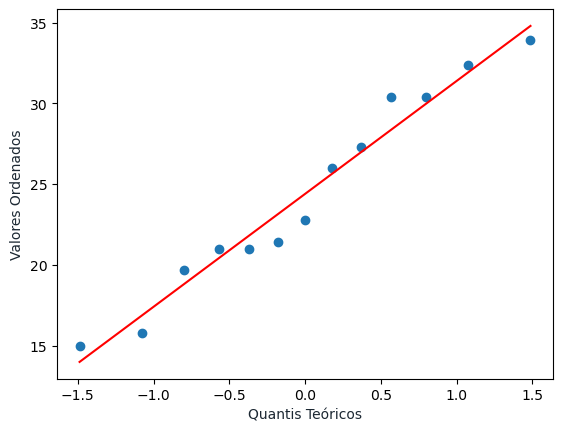

In [38]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np


grupo_auto = data[data['am'] == 0]['mpg']

grupo_manual = data[data['am'] == 1]['mpg']


amostra_auto = np.sort(grupo_auto)
amostra_manual = np.sort(grupo_manual)

a = 0.05
x_0 = phi_inversa(amostra_auto, a)
x_1 = phi_inversa(amostra_manual, a)

y_0 = amostra_auto
y_1 = amostra_manual

for i, (x, y) in enumerate(zip([x_0, x_1], [y_0, y_1])):
    plt.xlabel('Quantis Teóricos', color='#1C2833')
    plt.ylabel('Valores Ordenados', color='#1C2833')
    plt.plot(x, y, 'o', label=f'Group {i+1}')
    
    # ajusta uma reta sobre os pontos da amostra para facilitar a inspeção visual.
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    y = slope * x + intercept
    plt.plot(x, y, '-r', label='y=2x+1')
    plt.show()

# scipy.stats.probplot(amostra, dist="norm", plot=matplotlib.pyplot)

*Sua explicação aqui:*

O primeiro teste utilizado foi o Shapiro-Wilk e observamos que, dado um nível de significância de 5%, as duas amostras: **Miles per Galon para carros automáticos** e **Miles per Galon para carros manuais** seguem um padrão da distribuição normal. O valor-p calculado para a primeira amostra foi **0.89** e para a segunda foi de **0.53**. Dessa forma, a hipótese nula não pode ser descartada.

O segundo teste utilizado foi o QQ-Plot e observamos, graficamente que, dado um nível de significância de 5%, os pontos da amostra seguem, em sua maioria os seus quantis teóricos.

De uma maneira geral, observamos que a amostra do grupo manual possui uma maior variação dos dados, dando a entender que existe um padrão levemente diferente da distribuição normal.

---

(iii) Presumindo que os dados da coluna mpg seguem a distribuição normal, determine um
intervalo de confiança no nível 95% da diferença entre as médias dos modelos de carros
que possuem transmissão automática e os que possuem transmissão manual.

In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


def graus_lib(n_1, s_1, n_2, s_2):
  numerator = ((s_1*s_1)/n_1 + (s_2*s_2/n_2)) * ((s_1*s_1)/n_1 + ((s_2*s_2)/n_2))
  denominator = ((s_1*s_1/n_1)*(s_1*s_1/n_1))/(n_1-1) + ((s_2*s_2/n_2)*(s_2*s_2/n_2))/(n_2-1)
  return numerator / denominator

def erro_padrao(n_1, s_1, n_2, s_2):
  return np.sqrt((s_1*s_1)/n_1 + (s_2*s_2/n_2))




grupo_auto = data[data['am'] == 0]['mpg']
grupo_manual = data[data['am'] == 1]['mpg']

# Stats
x_bar_1 = np.mean(grupo_auto)
s_1 = np.std(grupo_auto, ddof=1)
x_bar_2 = np.mean(grupo_manual)
s_2 = np.std(grupo_manual, ddof=1)
n_1 = grupo_auto.shape[0]
n_2 = grupo_manual.shape[0]


# Diferença das médias
mean_diff = x_bar_2 - x_bar_1
print(f'Diferença das Médias: {mean_diff}')


# erro padrão
se = erro_padrao(n_1, s_1, n_2, s_2)
# graus de liberdade
df = graus_lib(n_1, s_1, n_2, s_2)


# Intervalo de confiança
t_crit = stats.t.ppf(0.975, df)
ci_lower = mean_diff - t_crit * se
ci_upper = mean_diff + t_crit * se

print(f"Intervalo de confiança (95%) para a diferença entre as médias: [{ci_lower:.2f}, {ci_upper:.2f}]")




Diferença das Médias: 7.244939271255056
Intervalo de confiança (95%) para a diferença entre as médias: [3.21, 11.28]


*Sua explicação aqui:*

**Confidence Interval**: (3.21, 11.28)

**Diff_Mean (Manual - Automtics)**: 7.245

Foi calculado os intervalos de confiança utilizando o intervalo de confiança desejado (95%) e os graus de liberdade (para amostras independentes) e com isso os 2 t_criticos associados. Por fim, podendo calcular o intervalo através da fórmula:

ci_lower = mean_diff - t_crit * se (erro padrão para amostras independentes)
ci_upper = mean_diff + t_crit * se


Observa-se que a diferença entre as médias permanece positiva ao longo do ic de 95%, com uma média de 7.245. Isso indica que, em média, veículos com câmbio manual apresentam um consumo de combustível (medido em mpg) maior do que os veículos automáticos. Logo, há evidências de que o tipo de transmissão está associado a uma diferença significativa na eficiência de combustível.

---

(iv) Suponha que, ao analisar os dados fornecidos, alguém levantou a alegação de que carros
automáticos e manuais não apresentam a mesma eficiência relativa a consumo de combustível.
Em particular, existe a suspeita de que carros com transmissão manual consumem
(em média) menos combustível que suas contra-partidas com transmissão automática.
Aplique um teste de hipóteses para verificar essa suspeita. Apresente e descreva claramente
a aplicação dos quatro passos do procedimento. Repare que são fornecidas duas
amostras independentes. Sendo assim, certifique-se de usar o teste de hipóteses adequado
para essa situação. Apresente sua análise para o nível de significância igual a 5%.

In [5]:
import numpy as np
from scipy.stats import t



alpha = 0.05

grupo_auto = data[data['am'] == 0]['mpg']
grupo_manual = data[data['am'] == 1]['mpg']


n_1 = grupo_auto.shape[0]
n_2 = grupo_manual.shape[0]

x_bar_1 = np.mean(grupo_auto)
s_1 = np.std(grupo_auto, ddof=1)

x_bar_2 = np.mean(grupo_manual)
s_2 = np.std(grupo_manual, ddof=1)

print("Média grupo de automaticos: %.4f." % x_bar_1)
print("Desvio padrão (automaticos): %.4f." % s_1)
print()
print("Média grupo de manuais: %.4f." % x_bar_2)
print("Desvio padrão (manuais): %.4f." % s_2)

se = erro_padrao(n_1, s_1, n_2, s_2)

# Diferença das médias
t_score = (x_bar_2 - x_bar_1)/se

print("\nValor do t-escore: %.4f" % t_score)

nu = graus_lib(n_1, s_1, n_2, s_2)

print("Graus de liberdade: %.2f" % nu)


# repare que é um teste bicaudal
pvalue = 2 * t.cdf(-t_score, df=nu)

print("\np-value: %.4f" % pvalue)


# Interpretar o resultado
if pvalue < alpha:
    print("\nHá evidência para rejeitar a hipótese nula.")
    print(f'p_value: {pvalue:.4f} menor que alpha: {alpha}')
else:
    print("\nNão há evidência para rejeitar a hipótese nula.")
    print(f'p_value: {pvalue:.4f} maior que alpha: {alpha}')


Média grupo de automaticos: 17.1474.
Desvio padrão (automaticos): 3.8340.

Média grupo de manuais: 24.3923.
Desvio padrão (manuais): 6.1665.

Valor do t-escore: 3.7671
Graus de liberdade: 18.33

p-value: 0.0014

Há evidência para rejeitar a hipótese nula.
p_value: 0.0014 menor que alpha: 0.05


*Sua explicação aqui:*

Os 4 passos do procedimento a seguir:

1. Formular as hipóteses nula e alternativa

- **H₀**: carros automáticos e manuais apresentam a mesma eficiência relativa a consumo de combustível (mu_D == 0).
- **H₁**: carros automáticos e manuais não apresentam a mesma eficiência relativa a consumo de combustível (mu_D != 0).

Este é um teste **bilateral**.

---

2. Computar a estatística de teste (test statistic)

Utilizamos o **teste t independente**, visto que as duas amostras são independentes (automáticos vs manuais).
Este método é apropriado para tratar variâncias diferentes entre os grupos!


---


3. Computar o p-valor (p-value)

Como é bilateral, podendo a diferença ser positiva ou negativa, multiplicamos por 2.

`pvalue = 2 * t.cdf(-t_score, df=nu)`


---


4. Interpretar e declarar o resultado

Como o p-valor (0.0014) é menor do que alpha (0.05), a hipótese nula PODE ser descartada. É significativo estatisticamente para conseguirmos contrariar **H₀**.



---

# (4) Teste ANOVA

### 4.1 Situação-problema I
Nesta parte, você deve estudar as condições que permitem usar o método de análise de variância
(ANOVA) para determinar se um grupo de populações tem uma média comum. Os dados
apresentados nas figuras 1, 2 e 3 correspondem às estimativas de milhas percorridas por galão
obtidas para amostras de modelos de carros de 1993, conforme relatado pelo Consumer Reports:
The 1993 Cars - Annual Auto Issue (abril de 1993).

(i) Se uma ou mais das amostras não passam no teste de normalidade, então não podemos
usar o método ANOVA. Sendo assim, antes de poder usar esse teste, você deve verificar as
condições de aplicabilidade dele. Primeiro verifique, se as amostras são aproximadamente
normalmente distribuídas. Em seguida, usando o teste de Levene, verifique se as amostras
possuem variâncias iguais do ponto de vista estatístico.


In [40]:
import numpy as np
from scipy import stats

compactos = np.array ([20, 25, 25, 20, 22, 22, 24, 26, 20, 24, 24, 23, 20,
23, 21, 21])
medios = np.array ([18, 19, 22, 22, 19, 16, 21, 21, 21, 20,17, 18, 18, 17,
19, 19, 18, 21, 23, 19, 22, 20])
grandes = np.array ([19, 16, 16, 17, 20, 20, 20, 18, 18, 19, 19, 15, 18,
17, 15, 18, 17, 18, 18, 17])


def apply_normal_test(x, alpha):
    k2, p = stats.normaltest(x)
    
    print("p = {:g}".format(p))
    
    if p < alpha:
        print("A hipótese nula pode ser rejeitada")
    else:
        print("Não há evidência estatística suficiente para rejeitar a hipótese nula")
        
alpha = 0.05
apply_normal_test(compactos, alpha)
apply_normal_test(medios, alpha)
apply_normal_test(grandes, alpha)

p = 0.236816
Não há evidência estatística suficiente para rejeitar a hipótese nula
p = 0.577089
Não há evidência estatística suficiente para rejeitar a hipótese nula
p = 0.792345
Não há evidência estatística suficiente para rejeitar a hipótese nula


c:\Users\parai\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


In [41]:
from scipy.stats import levene

# testa a hipótese nula de que todos os grupos têm variâncias iguais
# calcula o desvio em relação à média (por isso center = 'mean')
stat, p = levene(compactos, medios, grandes, center = 'mean')
print("p = {:g}".format(p))

alpha = 0.05

if p < alpha:
    print("A hipótese nula pode ser rejeitada")
else:
    print("Não há evidência estatística suficiente para rejeitar a hipótese nula")


p = 0.185309
Não há evidência estatística suficiente para rejeitar a hipótese nula


*Sua explicação aqui:*

1. Teste de normalidade:

A primeira condição para podermos aplicar o teste ANOVA envolve verificar se as distribuições sendo estudadas são normais ou aproximadamente normais. Para isso, do pacote scipy.stats, temos a função que que avalia a normalidade com base na assimetria e curtose da distribuição:

`k2, p = stats.normaltest(x)`

Nesse caso, todos os p_values foram maiores que o nível de significancia de 0.05, ou seja, não rejeitamos a hipótese nula (todas as distribuições normais).

2. Teste de levene:

A segunda condição para a ANOVA é a homogeneidade das variâncias, ou seja, que todos os grupos tenham variâncias aproximadamente iguais. Para verificar isso, usamos o teste de Levene, que testa a hipótese nula de igualdade das variâncias. Ele calcula os desvios absolutos em relação à média (por isso center='mean'):

`levene(grupo1, grupo2, grupo3, center='mean')`

Como o p-valor foi maior que 0,05, não rejeitamos a hipótese nula, o que indica que os grupos apresentam variâncias aproximadamente iguais.

---

(ii) Agora que você verificou as condições aplicabilidade do ANOVA, aplique esse teste para
verificar a hipótese nula de que as três populações têm médias estatisticamente iguais.
Declare as hipóteses nula e alternativa. A seguir, descreva sua conclusão. Use nível de
significância de 5%.

In [11]:
from scipy.stats import f_oneway

f_value, p = f_oneway(compactos, medios, grandes)

print("f_value = {:g}".format(f_value))
print("p = {:g}".format(p))

if p < alpha:
    print("A hipótese nula pode ser rejeitada")
else:
    print("Não há evidência estatística suficiente para rejeitar a hipótese nula")

f_value = 30.6432
p = 1.14267e-09
A hipótese nula pode ser rejeitada


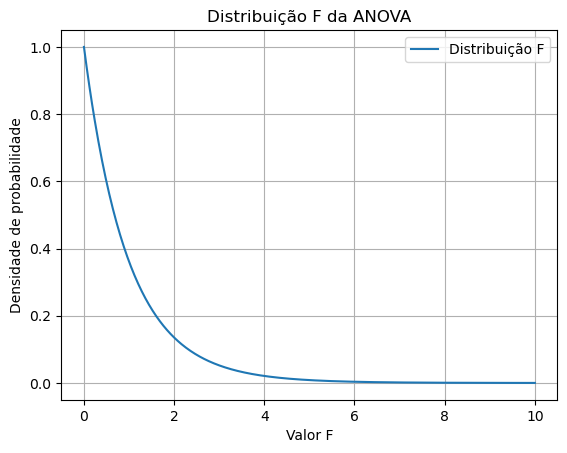

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Graus de liberdade
df_between = 2  # número de grupos - 1
df_within = len(compactos) + len(medios) + len(grandes) - 3  # total num de amostras - número de grupos

x = np.linspace(0, 10, 500) 
y = f.pdf(x, df_between, df_within)

plt.plot(x, y, label='Distribuição F')
plt.title('Distribuição F da ANOVA')
plt.xlabel('Valor F')
plt.ylabel('Densidade de probabilidade')
plt.legend()
plt.grid(True)
plt.show()


O teste ANOVA possui uma função implementada do pacote scipy.stats `f_oneway` que retorna o valor F e o valor p associado, passando como parâmetro os 3 grupos sendo estudados.

Vemos pelo gráfico acima que o valor F já chega próximo ao 0 até o valor F = 10. No nosso caso, o valor F retornou 30,6432. Visto isso, o p_valor associado é muito próximo de 0, sendo bem menor que o nível de significância de 0.05.

Desta forma, podemos rejeitar a hipótese nula de que as três amostras possuem médias iguais. Sendo assim, pelo menos um dos tipos de carros (compactos, médios e grandes) possui média de consumo de km/L diferente.

---

### 4.2 Situação-problema II

Em http://www.flatworldknowledge.com/sites/all/files/data9.xls, você encontra dados
que registram os custos dos materiais (livro didático, manual de solução, taxas de laboratório
e assim por diante) em cada um dos dez cursos diferentes em cada um dos três assuntos
diferentes, química, ciência da computação e matemática. Verifique, ao nível de significância de 1%, se os dados fornecem evidências suficientes para concluir que os custos médios nas três
disciplinas não são todos iguais. Apresente os detalhes de aplicação todos os quatro passos do
teste de hipóteses.

In [43]:
import pandas as pd

path = 'data9.xls'
data = pd.read_excel(path)


# Usar slicing no dataframe 
math = pd.to_numeric(data.iloc[:10, 1])
comp = pd.to_numeric(data.iloc[10:20, 1])
chem = pd.to_numeric(data.iloc[20:30, 1])

alpha = 0.01

apply_normal_test(math, alpha)
apply_normal_test(comp, alpha)
apply_normal_test(chem, alpha)

#data_crosstab = pd.crosstab(data, columns='MATH')

p = 0.118565
Não há evidência estatística suficiente para rejeitar a hipótese nula
p = 0.0465234
Não há evidência estatística suficiente para rejeitar a hipótese nula
p = 0.454288
Não há evidência estatística suficiente para rejeitar a hipótese nula


c:\Users\parai\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [44]:
from scipy.stats import levene

# testa a hipótese nula de que todos os grupos têm variâncias iguais
# calcula o desvio em relação à média (por isso center = 'mean')
stat, p = levene(math, comp, chem, center = 'mean')
print("p = {:g}".format(p))

alpha = 0.01

if p < alpha:
    print("A hipótese nula pode ser rejeitada")
else:
    print("Não há evidência estatística suficiente para rejeitar a hipótese nula")


p = 0.943731
Não há evidência estatística suficiente para rejeitar a hipótese nula


In [46]:
from scipy.stats import f_oneway

f_value, p = f_oneway(math, comp, chem)

alpha = 0.01

print("f_value = {:g}".format(f_value))
print("p = {:g}".format(p))

if p < alpha:
    print("A hipótese nula pode ser rejeitada")
else:
    print("Não há evidência estatística suficiente para rejeitar a hipótese nula")

f_value = 1.41805
p = 0.259654
Não há evidência estatística suficiente para rejeitar a hipótese nula


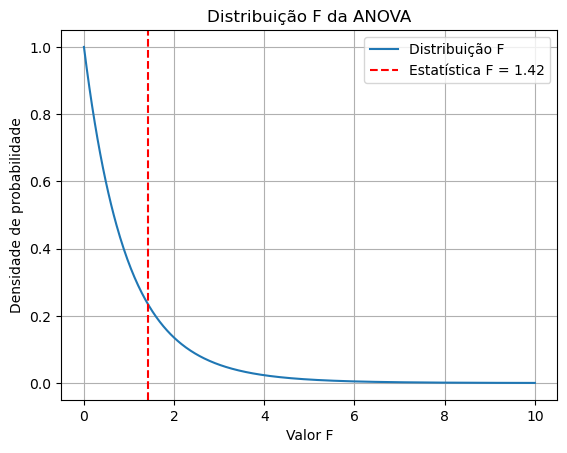

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Graus de liberdade
df_between = 2  # número de grupos (math, comp, chem) - 1
df_within = len(math) + len(comp) + len(chem) - 3  # total de amostras - número de grupos

x = np.linspace(0, 10, 500)
y = f.pdf(x, df_between, df_within) # função de densidade de probabilidade para o valor F 

plt.plot(x, y, label='Distribuição F')
plt.axvline(f_value, color='red', linestyle='--', label=f'Estatística F = {f_value:.2f}')
plt.title('Distribuição F da ANOVA')
plt.xlabel('Valor F')
plt.ylabel('Densidade de probabilidade')
plt.legend()
plt.grid(True)
plt.show()


*Sua explicação aqui:*

Primeiramente, realizamos a verificação das condições de aplicação do teste ANOVA, o normaltest e o teste de levene.

1. Teste de normalidade:
Dentro do nível de significância de 0.01, as amostras seguem uma distribuição aproximadamente normal:
    - p = 0.118565
    - p = 0.0465234
    - p = 0.454288

    Não há evidência estatística suficiente para rejeitar a hipótese nula (distribuição não é normal)

2. Teste de levene:
Dentro do nível de significância de 0.01, todos os grupos possuem variâncias aproximadamente iguais:
    - p = 0.943731

    Não há evidência estatística suficiente para rejeitar a hipótese nula (igualdade das variâncias entre os grupos)

3. Aplicação do teste ANOVA:
Dentro do nível de significância de 0.01, todos os grupos (MATH, COMP e CHEM) possuem custos médios nas três
disciplinas iguais
    - f_value = 1.41805
    - p = 0.259654

    Logo, não há evidência estatística suficiente para rejeitar a hipótese nula (custos médios nas três disciplinas são todos iguais).

---

# (5) Testes Qui-quadrado

### 5.1 Distribuição χ2

Suponha que uma variável aleatória Y siga a distribuição χ2 com k graus de liberdade, isto é,
Y ∼ χ2_(k). Por meio das funções apropriadas de R ou de Python, compute o que se pede a
seguir. Considere que k = 13.

(i) Pr(Y > 2.56)

(ii) Pr(2.56 < Y < 4.87)

(iii) O valor de y tal que Pr(Y < y) = 0.95

In [3]:
from scipy.stats import chi2

p_i = 1 - chi2.cdf(2.56, df=13)
print(f"Pr(Y > 2.56) = {p_i:.4f}")

p_ii = chi2.cdf(4.87, df=13) - chi2.cdf(2.56, df=13)
print(f"\nPr(2.56 < Y < 4.87) = {p_ii:.4f}")

y_95 = chi2.ppf(0.95, df=13)
print(f"\nPr(Y < y) = 0.95. y = {y_95:.4f}")

Pr(Y > 2.56) = 0.9991

Pr(2.56 < Y < 4.87) = 0.0212

Pr(Y < y) = 0.95. y = 22.3620


*Sua explicação aqui:*

(i) **Pr(Y > 2.56)**: probabilidade *p_i*, onde Y > 2.56 (área à direita da curva). Logo, calcular 1 - chi2.cdf(Y, df=13).

(ii) **Pr(2.56 < Y < 4.87)**: probabilidade *p_ii*, onde 2.56 < Y < 4.87 (área entre dois pontos debaixo da curva).

(iii) **O valor de y tal que Pr(Y < y) = 0.95**: ponto cuja área à esquerda corresponde área de 0.95.

---

### 5.2 Teste χ2 (situação-problema I)

Considere novamente o conjunto de dados denominado mtcars. Para este conjunto de dados,
descubra se as variáveis cyl e carb são ou não dependentes. Para isso, utilize o teste χ2.
Apresente o desenvolvimento, isto é, os comandos em R ou Python que você utilizou para
chegar à conclusão.

In [48]:
import pandas as pd
from scipy.stats import chi2_contingency
import pandas as pd


path = 'mtcars.csv'
df = pd.read_csv(path, header=0, delimiter = ',')

# tabela de contingência usando o método do pandas
# colunas = 'cyl'
# linhas = 'carb'
contingency_table = pd.crosstab(df['cyl'], df['carb'])

# Aplicar o teste qui-quadrado
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("\nEstatística do qui-quadrado:", chi2_stat)
print("\nValor-p:", p_val)
print("\nGraus de liberdade:", dof)
print("\nFrequências esperadas sob H0:")
print(pd.DataFrame(expected, columns=contingency_table.columns).head())



Estatística do qui-quadrado: 24.38886827458256

Valor-p: 0.006632477762992059

Graus de liberdade: 10

Frequências esperadas sob H0:
carb        1       2        3       4        6        8
0     2.40625  3.4375  1.03125  3.4375  0.34375  0.34375
1     1.53125  2.1875  0.65625  2.1875  0.21875  0.21875
2     3.06250  4.3750  1.31250  4.3750  0.43750  0.43750


In [49]:
# Verificar Condições de Aplicabilidade - cyl e carb


# 1. Variáveis categóricas?
# cyl (número de cilindros): assume valores discretos categóricos
# carb (número de carburadores): também assume valores discretos categóricos

# 2. Independência das observações
# cada linha do dataset mtcars representam unidades diferentes (carros distintos)

# 3. Frequências esperadas razoavelmente grandes
import numpy as np

# Flatten a matriz de frequências esperadas
flat_expected = expected.flatten()
less_than_5 = np.sum(flat_expected < 5)
less_than_1 = np.sum(flat_expected < 1)
total_cells = flat_expected.size

percent_below_5 = 100 * less_than_5 / total_cells
print(f"Número de células com frequência esperada < 1: {less_than_1} de {total_cells}")
print(f"Número de células com frequência esperada < 5: {less_than_5} de {total_cells}")
print(f"Percentual de células com frequência esperada < 5: {percent_below_5:.1f}%")

# regra prática:
# Nenhuma célula com frequência esperada < 1.
# No máximo 20% das células com frequência esperada < 5.

Número de células com frequência esperada < 1: 7 de 18
Número de células com frequência esperada < 5: 18 de 18
Percentual de células com frequência esperada < 5: 100.0%


*Sua explicação aqui:*

O objetivo do teste é para verificar se as variáveis cyl e carb são ou não dependentes.

1. Formular as hipóteses nula e alternativa

- **H₀**: As variáveis cyl e carb são independentes.
- **H₁**: As variáveis são associadas (dependentes) uma a outra.

2. Montar a tabela de contingência

O pacote Pandas fornece a função crosstab, usada para montar a tabela de contingência para a aplicação posterior do teste X².

3. Estabelecer o teste de estatistica

O pacote scipy.stats fornece a implementação do Qui_quadrado `chi2_contingency(contingency_table)`, que já encapsula a lógica do teste e só é preciso passar como parâmetro a tabela de contingência. Ela irá retornar `chi2_stat, p_val, dof, expected`, o valor da estatística, o p-valor, o grau de liberdade e o valor esperado da tabela passada.

4. Resultado final

Como o p-valor = 0.0066, foi muito menor que o alpha = 0.05, podemos descartar a hipótese nula. Ou seja, há evidência significativa de que as variáveis cyl e carb são dependentes.

---


### 5.3 Teste χ2 (situação-problema II)

A fabricante das balinhas Zuzuba produz balinhas de diferentes cores. Esse fabricante alega
que cada pacote produzido contém quantidades de balinhas de cada cor que não diferem significativamente
das que são apresentadas na segunda coluna da tabela Tabela 1. Para testar
essa alegação, um auditor comprou um pacote de Zuzubas em uma loja perto de sua casa e
contou as quantidades de cada cor. Os dados levantados pelo auditor estão na terceira coluna
da Tabela 1. Se o fabricante estiver correto, então não deve haver diferença significativa entre
as quantidades de diversas cores de Zuzubas que ela alega depositar em cada pacote e as
quantidades que o auditor encontrou.

cor | esperado | observado
--- | --- | ---
vermelho | 18 | 24
verde | 19 | 16
roxo | 16 | 13
azul | 6 | 20
laranja | 24 | 20
amarelo | 17 | 14

(i) Utilizando o R ou Python, apresente dois gráficos de setores (pie charts), um para as
quantidades esperadas e outro para as quantidades observadas de cores.

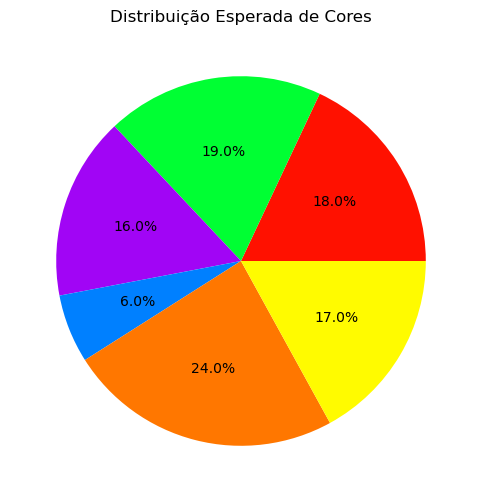

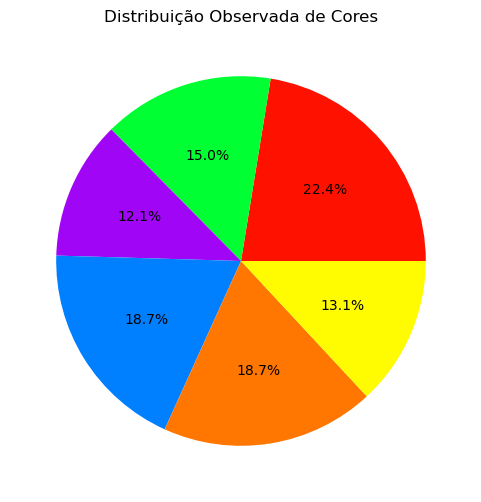

In [50]:
import matplotlib.pyplot as plt
import numpy as np

esperado = np.array([18,19,16,6,24,17])
observado = np.array([24,16,13,20,20,14])
cores = [[255, 17, 0], [0, 255, 51], [161, 5, 245], [0, 128, 255], [255, 119, 0], [255, 251, 0]]

# Normalizar as cores para o formato matplotlib (0-1)
cores_norm = np.array(cores) / 255

# Pie chart para 'esperado'
plt.figure(figsize=(6, 6))
plt.pie(esperado, colors=cores_norm, autopct='%1.1f%%')
plt.title('Distribuição Esperada de Cores')
plt.show()

# Pie chart para 'observado'
plt.figure(figsize=(6, 6))
plt.pie(observado, colors=cores_norm, autopct='%1.1f%%')
plt.title('Distribuição Observada de Cores')
plt.show()


(ii) Também utilizando R ou Python, teste a hipótese nula de que a alegação do fabricante é
verdadeira, usando nível de significância α = 0,05. Apresente os seguintes valores: graus
de liberdade, valor da estatística e o valor-p. Apresente também a sua conclusão, contra
ou a favor da hipótese nula, justificando sua resposta.

In [51]:
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np


cores_nome = ["vermelho", "verde", "roxo", "azul", "laranja", "amarelo"]
esperado = np.array([18,19,16,6,24,17])
observado = np.array([24,16,13,20,20,14])

contingency_table = pd.DataFrame({'Esperado': esperado, 'Observado': observado}, index=cores_nome)


# Aplicar o teste qui-quadrado
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("\nEstatística do qui-quadrado:", chi2_stat)
print("\nValor-p:", p_val)
print("\nGraus de liberdade:", dof)
print("\nFrequências esperadas sob H0:")
print(pd.DataFrame(expected, columns=contingency_table.columns).head())

if (p_val < 0.05):
    print("Rejeitamos a Hipotese nula (p_valor < α)")
else:
    print("Não há evidências para rejeitar hipótese nula (p_valor > α)")





Estatística do qui-quadrado: 9.391075218545035

Valor-p: 0.09444595280621262

Graus de liberdade: 5

Frequências esperadas sob H0:
    Esperado  Observado
0  20.289855  21.710145
1  16.908213  18.091787
2  14.009662  14.990338
3  12.560386  13.439614
4  21.256039  22.743961
Não há evidências para rejeitar hipótese nula (p_valor > α)


In [52]:
# Verificar Condições de Aplicabilidade - zuzubas


# 1. Variáveis categóricas?
# Uma única variável categórica (cor).

# 2. Independência das observações
# Cada contagem (frequência observada) deve vir de observações independentes

# 3. Frequências esperadas razoavelmente grandes
import numpy as np

# Flatten a matriz de frequências esperadas
flat_expected = expected.flatten()
less_than_5 = np.sum(flat_expected < 5)
less_than_1 = np.sum(flat_expected < 1)
total_cells = flat_expected.size

percent_below_5 = 100 * less_than_5 / total_cells
print(f"Número de células com frequência esperada < 1: {less_than_1} de {total_cells}")
print(f"Número de células com frequência esperada < 5: {less_than_5} de {total_cells}")
print(f"Percentual de células com frequência esperada < 5: {percent_below_5:.1f}%")

# regra prática:
# Nenhuma célula com frequência esperada < 1.
# No máximo 20% das células com frequência esperada < 5.

# Sim, frequências esperadas razoavelmente grandes.

Número de células com frequência esperada < 1: 0 de 12
Número de células com frequência esperada < 5: 0 de 12
Percentual de células com frequência esperada < 5: 0.0%


*Sua explicação aqui:*

1. Formular as hipóteses nula e alternativa

- **H₀**: Não há diferença significativa entre as quantidades de diversas cores de Zuzubas em cada pacote.
- **H₁**: Há diferença significativa entre as quantidades diversas de cores de Zuzubas.


2. Montar a tabela de contingência

Criamos um pd.DataFrame para elaborar nossa tabela de contingência manualmente.

3. Estabelecer o teste de estatistica

O pacote scipy.stats fornece a implementação do Qui_quadrado `chi2_contingency(contingency_table)`, que já encapsula a lógica do teste e só é preciso passar como parâmetro a tabela de contingência. Ela irá retornar `chi2_stat, p_val, dof, expected`, o valor da estatística, o p-valor, o grau de liberdade e o valor esperado da tabela passada.

4. Resultado final

Como o p-valor = 0.0066, foi muito menor que o alpha = 0.05, podemos descartar a hipótese nula.

---


### 5.4 Teste χ2 (situação-problema III)
Considere um caso hipotético em que se deseja testar a eficácia de um medicamento para um
determinado problema médico. Suponha que temos 105 pacientes em estudo e 50 deles foram
tratados com a droga. Os restantes 55 pacientes foram mantidos como amostras de controle.
O estado de saúde de todos os pacientes foi verificado após uma semana. Os dados e resultados
para todos esse indivíduos podem ser encontrados no arquivo treatment.csv.

Nesta situação problema, temos duas variáveis discretas, uma que indica se o paciente foi
tratado com o medicamento (treated ou not-treated), e outra que indica se o paciente melhorou
ou não (improved ou not-improved) Utilizando R ou Python, verifique a alegação de que as
duas variáveis são dependentes, usando nível de significância α = 0,05.

In [53]:
import pandas as pd

path = 'https://raw.githubusercontent.com/selva86/datasets/master/treatment.csv'
data = pd.read_csv(path, header=0, delimiter=',')
data_crosstab = pd.crosstab(data['treatment'],
data['improvement'],
margins = False)
print(data_crosstab)

improvement  improved  not-improved
treatment                          
not-treated        26            29
treated            35            15


In [54]:
from scipy.stats import chi2_contingency

# Aplicar o teste qui-quadrado
chi2_stat, p_val, dof, expected = chi2_contingency(data_crosstab)

print("\nEstatística do qui-quadrado:", chi2_stat)
print("\nValor-p:", p_val)
print("\nGraus de liberdade:", dof)
print("\nFrequências esperadas sob H0:")
print(pd.DataFrame(expected, columns=data_crosstab.columns).head())

if (p_val < 0.05):
    print("\nRejeitamos a Hipotese nula (p_valor < α)")
else:
    print("\nNão há evidências para rejeitar hipótese nula (p_valor > α)")




Estatística do qui-quadrado: 4.6625668947297125

Valor-p: 0.030827072412198585

Graus de liberdade: 1

Frequências esperadas sob H0:
improvement   improved  not-improved
0            31.952381     23.047619
1            29.047619     20.952381

Rejeitamos a Hipotese nula (p_valor < α)


In [55]:
# Verificar Condições de Aplicabilidade - treatment


# 1. Variáveis categóricas?
# treatment: treated vs not-treated -> variável categórica
# improvement: improved vs not-improved -> variável categórica

# 2. Independência das observações
# Como cada linha representa um paciente diferente, então as observações são independentes.

# 3. Frequências esperadas razoavelmente grandes
import numpy as np

# Flatten a matriz de frequências esperadas
flat_expected = expected.flatten()
less_than_5 = np.sum(flat_expected < 5)
less_than_1 = np.sum(flat_expected < 1)
total_cells = flat_expected.size

percent_below_5 = 100 * less_than_5 / total_cells
print(f"Número de células com frequência esperada < 1: {less_than_1} de {total_cells}")
print(f"Número de células com frequência esperada < 5: {less_than_5} de {total_cells}")
print(f"Percentual de células com frequência esperada < 5: {percent_below_5:.1f}%")

# regra prática:
# Nenhuma célula com frequência esperada < 1.
# No máximo 20% das células com frequência esperada < 5.

# Sim, frequências esperadas razoavelmente grandes.

Número de células com frequência esperada < 1: 0 de 4
Número de células com frequência esperada < 5: 0 de 4
Percentual de células com frequência esperada < 5: 0.0%


*Sua explicação aqui:*

- Formular as hipóteses nula e alternativa

**H₀**: As variáveis treated e not-treated são independentes.

**H₁**: As variáveis são associadas entre si.


- Estabelecer o teste de estatistica

O pacote scipy.stats fornece a implementação do Qui_quadrado `chi2_contingency(contingency_table)`, que já encapsula a lógica do teste e só é preciso passar como parâmetro a tabela de contingência. Ela irá retornar `chi2_stat, p_val, dof, expected`, o valor da estatística, o p-valor, o grau de liberdade e os valores esperados da tabela passada.

- Resultado final

Como o p-valor = 0.03, foi menor que o alpha = 0.05, podemos descartar a hipótese nula. Ou seja, há evidência significativa de que as variáveis são dependentes entre si

---


### 5.5 Teste χ2 (situação-problema IV)

Em http://www.flatworldknowledge.com/sites/all/files/data4.xls, está disponível um
conjunto de dados que registra o resultado de 500 arremessos de um dado de seis lados. Verifique,
ao nível de significância de 10%, se há evidência suficiente para concluir que o dado não é
“justo” (ou “balanceado”), ou seja, que a distribuição de probabilidade difere da probabilidade
1/6 para cada das seis faces do dado. Forneça a descrição detalhada dos quatro passos de
aplicação do teste.

In [56]:
import pandas as pd

path = 'data4.xls'
data = pd.read_excel(path)
N = len(data)

observed = data['Die Result'].value_counts().sort_index()

expected = pd.DataFrame([N/6]*6, columns=['Expected Result'])


observed, expected

(Die Result
 1    80
 2    97
 3    81
 4    82
 5    77
 6    83
 Name: count, dtype: int64,
    Expected Result
 0        83.333333
 1        83.333333
 2        83.333333
 3        83.333333
 4        83.333333
 5        83.333333)

In [57]:
from scipy.stats import chi2


def calcular_X_squared(observed,expected):
    x_squared = 0
    for i in range(len(observed)):
        x_squared+=((observed.iloc[i]-expected.iloc[i])**2)/expected.iloc[i]
    return x_squared

x_squared = calcular_X_squared(observed, expected)

dof = 5 # k - 1

p_value = 1 - chi2.cdf(x_squared, df=dof)

print(f'p-valor: {p_value}')

if (p_value < 0.1):
    print("\nRejeitamos a Hipotese nula (p_valor < α)")
else:
    print("\nNão há evidências para rejeitar hipótese nula (p_valor > α)")




p-valor: [0.70861918]

Não há evidências para rejeitar hipótese nula (p_valor > α)


In [58]:
# Verificar Condições de Aplicabilidade - dados


# 1. Variáveis categóricas?
# Uma única variável categórica (o lado de um dado)

# 2. Independência das observações
# Como cada linha representa um lance de dado, as observações são independentes.

# 3. Frequências esperadas razoavelmente grandes
import numpy as np

# Flatten a matriz de frequências esperadas
flat_expected = expected.values
less_than_5 = np.sum(flat_expected < 5)
less_than_1 = np.sum(flat_expected < 1)
total_cells = flat_expected.size

percent_below_5 = 100 * less_than_5 / total_cells
print(f"Número de células com frequência esperada < 1: {less_than_1} de {total_cells}")
print(f"Número de células com frequência esperada < 5: {less_than_5} de {total_cells}")
print(f"Percentual de células com frequência esperada < 5: {percent_below_5:.1f}%")

# regra prática:
# Nenhuma célula com frequência esperada < 1.
# No máximo 20% das células com frequência esperada < 5.

# Sim, frequências esperadas razoavelmente grandes.

Número de células com frequência esperada < 1: 0 de 6
Número de células com frequência esperada < 5: 0 de 6
Percentual de células com frequência esperada < 5: 0.0%


*Sua explicação aqui:*

1. Formular as hipóteses nula e alternativa

- **H₀**: A distribuição teórica esperada (uniforme para 1/6 de chance para cada lado do dado) se apresenta neste dado.
- **H₁**: A distribuição teórica esperada não se apresenta no dado (o dado está desbalanceado).


2. Montar a tabela de contingência

Separamos o pd.DataFrame 'observed' para elaborar a tabela de contingência dos dados observados. Para isso, foi feito um value_counts() para cada categoria (1,2,3,4,5,6). E criamos um pd.DataFrame separado para os valores esperados. `pd.DataFrame([N/6]*6, columns=['Expected Result'])` contém a distribuição teórica esperada.

3. Estabelecer o teste de estatistica

Foi elaborada a `def calcular_X_squared(observed,expected):`, recebendo como parâmetro as tabelas observed e expected e nela, aplicamos a formula SUM[(O-E)²/E], para cada *i* correspondente. Com isso, obtemos a estatística X² e em seguida utilizamos o `chi2.cdf` do pacote scipy.stats para calcular a área debaixo da curva à direita de X² `1 - chi2.cdf(x_squared, df=5)`. Utilizamos df = 5, pois existem 6 categorias - 1 = 5.

4. Resultado final

Como o p-valor = 0.7086, foi muito maior que o alpha = 0.1, não temos evidência suficiente para descartar a hipótese nula.

---


# (6) Teste de Permutação

A Figura 4 mostra os resultados de um experimento no qual 7 de 16 camundongos foram
selecionados aleatoriamente para receber um novo tratamento médico, enquanto os 9 restantes
foram atribuídos ao grupo sem tratamento (controle). O tratamento tinha como objetivo
prolongar a sobrevivência após uma cirurgia de teste. Em particular, a coluna “Data” mostra
o tempo de sobrevivência após a cirurgia, em dias, para todos os 16 camundongos. Essa mesma
figura também apresenta, para cada amostra: tamanho, média, desvio padrão.
Utilize o teste de permutação para responder à seguinte pergunta de pesquisa (use nível de
significância igual a 5%): O tratamento prolongou a sobrevivência?. Você deve apresentar a
declaração das hipóteses, descreva como calculou a estatística de deste e o p-valor, a finalmente
apresente sua conclusão.

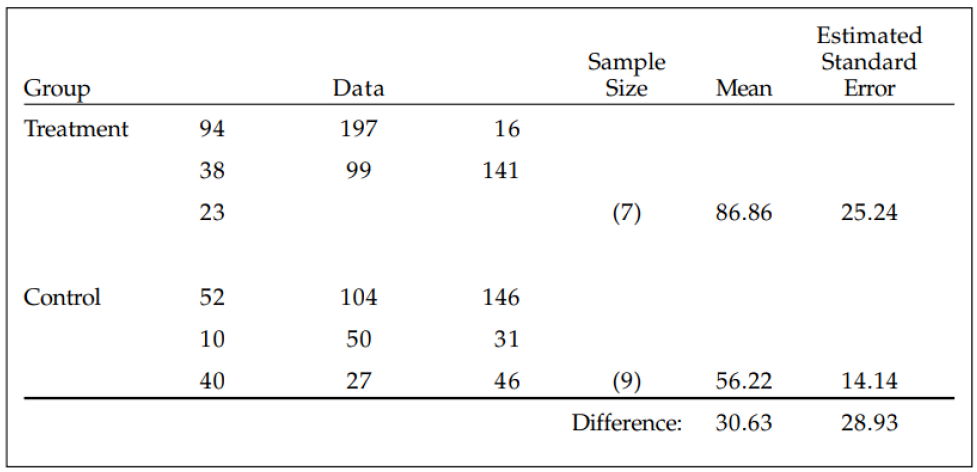

In [4]:
# Não sabemos nada sobre a população neste caso. Logo, é fundamental usarmos um teste não-paramétrico.

# Amostras:
# Grupo de teste (tempo de sobrevivência dos ratos após cirurgia de teste)
# Grupo de controle (tempo de sobreivência, mas sem cirurgia de teste)

import numpy as np

# Geração da distribuição nula
def permutation_test(group1, group2, num_permutations=1000):
    """
    Perform a permutation test to compare the means of two groups.

    Parameters:
        group1 (array-like): Data for the first group.
        group2 (array-like): Data for the second group.
        num_permutations (int): Number of permutations to perform.

    Returns:
        p_value (float): The p-value of the test.
    """
    
    # Diferença das médias observada
    observed_diff = np.mean(group1) - np.mean(group2)

    # Combinar as amostras em um só array
    combined = np.concatenate([group1, group2])

    # 1000 permutações aleatórias da amostra combined
    perm_diffs = []
    for _ in range(num_permutations):
        
        # misturar "combined" aleatoriamente
        np.random.shuffle(combined)
        
        # Dividir combined em 2 grupos com os mesmos tamanhos dos grupos originais (n1 e n2)
        perm_group1 = combined[:len(group1)]
        perm_group2 = combined[len(group1):]
        
        # Computar a diferença das médias e inserir no array perm_diffs
        perm_diffs.append(np.mean(perm_group1) - np.mean(perm_group2))

    # converter para np array
    perm_diffs = np.array(perm_diffs)

    # Teste unilateral (não usamos os valores absolutos)
    p_value = np.mean(perm_diffs >= observed_diff)

    return observed_diff, perm_diffs, p_value

amostra_treatment = [94,197,16,38,99,141,23]
amostra_ctrl = [52,104,146,10,50,31,40,27,46]

np.random.seed(42)  # Para reprodutibilidade

observed_diff, perm_diffs, p_value = permutation_test(amostra_treatment,amostra_ctrl)


alpha = 0.05

if p_value < alpha:
    print("A hipótese nula pode ser rejeitada")
    print(f"P-valor: {p_value}")
else:
    print("Não há evidência estatística suficiente para rejeitar a hipótese nula")
    print(f"P-valor: {p_value}")



Não há evidência estatística suficiente para rejeitar a hipótese nula
P-valor: 0.138


*Sua explicação aqui:*

**HIPÓTESES**

- **H₀**: não há diferença estatisticamente significativa entre as médias das duas amostras
- **H₁**: há diferença estatisticamente significativa entre as médias das duas amostras


No teste de permutação a estatística de interesse é a **diferença das médias**. A partir dela, é possível criar a distribuição nula:

1. Calcular a diferença das médias observada:
    - `observed_diff = np.mean(group1) - np.mean(group2)`
2. Concatenar as observações das duas amostras.
3. Permutar aleatoriamente as observações agrupadas na amostra única feita em 2.
4. Calcular a média para as primeiras n1 (no nosso caso, 7) observações da amostra única obtida a partir do item 3. Fazer o mesmo para as restantes n2 observações (9 observações restantes). Após isso, computar a diferença dessas médias e inserir no array `perm_diffs`.
5. Os itens 3. e 4. serão iterados em `num_permutations` vezes (no nosso caso, 1000)

Após as iterações das permutações e obtendo o array perm_diffs, podemos criar um outro array booleano onde cada elemento é True se a diferença obtida pela permutação for igual ou maior (em valor absoluto) que a diferença observada da amostra original, feita no item 1. 

Dessa forma, o p_valor será a média desse array booleano, representando a proporção de vezes em que as diferenças permutadas foi maior que a diferença observada.

No nosso caso, p_valor foi 0.138 > 0.05 (alpha). Logo, não podemos rejeitar a hipótese nula (não há diferença estatisticamente significativa entre as médias das duas amostras).

---

# (7) Bootstrap

Essa parte do trabalho é uma adaptação do Problema 9 na seção 5.4 de An Introduction to
Statistical Learning6. O conjunto de dados usado aqui é o denominado Boston. Uma descrição
desse conjunto de dados pode ser encontrada em http://lib.stat.cmu.edu/datasets/
boston.

(i) Com base neste conjunto de dados, forneça uma estimativa pontual para a média populacional
da variável medv. Chame essa estimativa μ_hat.

(ii) Forneça uma estimativa do erro padrão de μ_hat. Interprete o resultado.

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/AILAB-CEFET-RJ/gcc1625/refs/heads/main/data/Boston.csv'

boston = pd.read_csv(url)

In [ ]:
import numpy as np


mu_hat = np.mean(boston['medv'])
s = boston['medv'].std(ddof=1)

n = len(boston)
se = s / np.sqrt(n)

print(f"Estimativa pontual da média populacional (μ̂ ): {mu_hat:.4f}")
print(f"Erro padrão da média (SE): {se:.4f}")

Estimativa pontual da média populacional (μ̂ ): 22.5328
Erro padrão da média (SE): 0.4089


*Sua explicação aqui:*

Um erro padrão baixo de 0.4089 sugere que a média amostral é uma estimativa precisa da média populacional, uma vez que o erro padrão mede a variabilidade esperada da média amostral em relação à verdadeira média da população.
Assim, um valor reduzido indica que, se repetíssemos o processo de amostragem diversas vezes, as médias amostrais tenderiam a ficar próximas entre si e próximas da média populacional.

---

(iii) Agora estime o erro padrão de μ_hat usando o método Bootstrap. Como essa estimativa se
compara com sua resposta de (ii)?

In [4]:
sample = boston['medv']

medias = []

# Bootstrap
np.random.seed(42)  # Para reprodutibilidade

for i in range(10000):
    sample_bootstrap = np.random.choice(sample,n,replace=True)   
    medias.append(np.mean(sample_bootstrap))

std = np.std(medias)
print(std)

0.4051470768150291


*Sua explicação aqui:*

O Erro Padrão usando a técnica de bootstraping foi de 0.4051, enquanto a estimativa feita em (ii) foi de 0.4089. Pequenas diferenças podem ocorrer se houver assimetria ou outliers na amostra original. Porém, os dados sendo aproximadamente normais e independentes, os dois erros padrões serão próximos.




---

(iv) Com base em sua estimativa de bootstrap de (iii), forneça um intervalo de confiança de
95% para a média de medv. Compare-o com os resultados obtidos usando t-test sobre o
atributo medv.

In [5]:
from scipy.stats import t

alpha = 0.05

# Bootstrap
lower_b = np.percentile(medias, 100*alpha/2)
upper_b = np.percentile(medias, 100*(1-alpha/2))

print(f"Intervalo de confiança bootstrap (95%) para a média de medv: [{lower_b:.2f}, {upper_b:.2f}]")

# T-test
medv = boston['medv']
n = len(medv)
t_crit = t.ppf(alpha/2,df=n-1)

s = np.std(medv, ddof = 1)
me = np.abs(t_crit *  s/np.sqrt(n))

lower_t = np.mean(medv) - me
upper_t = np.mean(medv) + me

print(f"Intervalo de confiança t-test (95%) para a média de medv: [{lower_t:.2f}, {upper_t:.2f}]")

Intervalo de confiança bootstrap (95%) para a média de medv: [21.77, 23.36]
Intervalo de confiança t-test (95%) para a média de medv: [21.73, 23.34]


*Sua explicação aqui:*

Ambos os intervalos de confiança são bem semelhantes, por conta dos dados serem normais e sem muitos outliers.

---


(v) Com base neste conjunto de dados, forneça uma estimativa, μ_hat_med, para a mediana populacional
de medv.

In [6]:
mu_hat_med = np.median(boston['medv'])

print(f"Estimativa pontual da mediana populacional (μ_hat_med): {mu_hat_med}")

Estimativa pontual da mediana populacional (μ_hat_med): 21.2


(vi) Agora você deve estimar o erro padrão de μ_hat_med. Infelizmente, não há uma fórmula
simples para calcular o erro padrão da mediana. Em vez disso, estime o erro padrão da
mediana usando o método bootstrap. Comente suas descobertas.

In [7]:
sample = boston['medv']

medianas = []

# Bootstrap
np.random.seed(42)  # Para reprodutibilidade

for i in range(10000):
    sample_bootstrap = np.random.choice(sample,n,replace=True)   
    medianas.append(np.median(sample_bootstrap))

std = np.std(medianas)
print(std)

0.37698037296389814


*Sua explicação aqui:*

O erro padrão da mediana indica a variabilidade esperada na mediana, caso repetíssemos a amostragem várias vezes.

Assim como para a média, quanto menor esse erro, mais precisa é a estimativa da mediana.

No nosso caso, o erro padrão para a mediana é bem baixo (0.3769), mas bem próximo do erro padrão para a média (0.4051).

---

(vii) Forneça uma estimativa para o décimo percentil do atributo medv. Chame essa quantidade
de μ_hat(0.1).

In [8]:
mu_hat_01 = np.percentile(boston['medv'], 10)

print(mu_hat_01)

12.75


(viii) Use o método bootstrap para estimar o erro padrão de ˆμ0.1. Comente suas descobertas.

In [9]:
sample = boston['medv']

decimo_percentis = []

# Bootstrap
np.random.seed(42)  # Para reprodutibilidade

for i in range(10000):
    sample_bootstrap = np.random.choice(sample,n,replace=True)   
    decimo_percentis.append(np.percentile(sample_bootstrap,10))

print(np.std(decimo_percentis))

0.5005240397823065


*Sua explicação aqui:*

O erro padrão do décimo percentil indica o quanto o percentil de 10% variaria se repetíssemos a amostragem diversas vezes.

Como o erro é baixo, significa que o percentil de 10% é uma estimativa precisa e estável. O seu valor foi um pouco maior que o da média, feito anteriormente (0.4051).

Esse aumento é esperado, pois a estimativa de percentis em regiões extremas da distribuição, como as caudas, tende a apresentar maior variabilidade do que medidas centrais, como a média ou a mediana.

---

# (8) Teste de Permutação vs Bootstrap


Uma empresa quer saber se é eficiente ensinar novas ferramentas aos seus funcionários usando
cursos pela internet. A empresa seleciona aleatoriamente 7 trabalhadores e os atribui a dois
grupos de tamanhos 4 e 3. O primeiro grupo frequentou aulas tradicionais, e o segundo frequentou
cursos pela internet. Após a realização dos cursos, foi aplicado um teste aos trabalhadores,
cujos resultados foram:

- Cursos na Internet: 37, 49, 55, 57
- Cursos tradicionais: 23, 31, 46

Verifique se os cursos da Internet são mais efetivos do que os cursos tradicionais. Para isso,
aplique um teste de permutação e um teste de bootstrap. Use o nível de significância α = 0.1.
Os dois testes levam à mesma conclusão?

In [6]:
import numpy as np

# Geração da distribuição nula
def permutation_test(group1, group2, num_permutations=1000):
    """
    Perform a permutation test to compare the means of two groups.

    Parameters:
        group1 (array-like): Data for the first group.
        group2 (array-like): Data for the second group.
        num_permutations (int): Number of permutations to perform.

    Returns:
        p_value (float): The p-value of the test.
    """
    
    # Diferença das médias observada
    observed_diff = np.mean(group1) - np.mean(group2)

    # Combinar as amostras em um só array
    combined = np.concatenate([group1, group2])

    # 1000 permutações aleatórias da amostra combined
    perm_diffs = []
    for _ in range(num_permutations):
        
        # misturar "combined" aleatoriamente
        np.random.shuffle(combined)
        
        # Dividir combined em 2 grupos com os mesmos tamanhos dos grupos originais (n1 e n2)
        perm_group1 = combined[:len(group1)]
        perm_group2 = combined[len(group1):]
        
        # Computar a diferença das médias e inserir no array perm_diffs
        perm_diffs.append(np.mean(perm_group1) - np.mean(perm_group2))

    # converter para np array
    perm_diffs = np.array(perm_diffs)

    # Teste unilateral (não usamos os valores absolutos)
    p_value = np.mean(perm_diffs >= observed_diff)

    return observed_diff, perm_diffs, p_value


np.random.seed(42)  # Para reprodutibilidade

amostra_internet = [37, 49, 55, 57]
amostra_tradicional = [23, 31, 46]

observed_diff, perm_diffs, p_value_perm = permutation_test(amostra_internet, amostra_tradicional)

alpha = 0.1

if p_value_perm < alpha:
    print("A hipótese nula pode ser rejeitada")
    print(f"P-valor (permutation test): {p_value_perm}")
else:
    print("Não há evidência estatística suficiente para rejeitar a hipótese nula")
    print(f"P-valor (permutation test): {p_value_perm}")



A hipótese nula pode ser rejeitada
P-valor (permutation test): 0.06


IC(90%): [4.0 , 27.0]


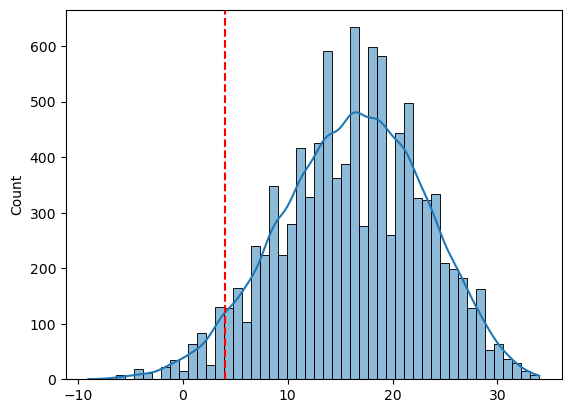

In [7]:
import numpy as np
import seaborn as sns
from scipy.stats import t
import matplotlib.pyplot as plt

def boostrap(sample1,sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    diffs_x_bar = []
    for i in range(10000):
        sample1_bootstrap = np.random.choice(sample1,n1,replace=True)   
        sample2_bootstrap = np.random.choice(sample2,n2,replace=True)
        diffs_x_bar.append(np.mean(sample1_bootstrap) - np.mean(sample2_bootstrap))
    return diffs_x_bar
    
amostra_internet = [37, 49, 55, 57]
amostra_tradicional = [23, 31, 46]

diffs_x_bar = boostrap(amostra_internet, amostra_tradicional)

# Hipótese nula é de que Diff_x_bar = 0

# Intervalos
ci_lower = np.percentile(diffs_x_bar, 5)
ci_upper = np.percentile(diffs_x_bar, 95)

# Ver se o 0 está dentro do intervalo de confiança
print(f"IC(90%): [{ci_lower} , {ci_upper}]")

sns.histplot(diffs_x_bar,bins=50,kde=True)
plt.axvline(ci_lower, color='red', linestyle='dashed')



*Sua explicação aqui:*

Para ambos os testes, queremos testar as seguintes hipóteses:

**H₀**: não há diferença estatisticamente significativa entre as médias das duas amostras (Diferença das médias = 0)

**H₁**: há diferença estatisticamente significativa entre as médias das duas amostras

- Teste de Permutação:

Nesse caso, há evidência estatística suficiente para rejeitar a hipótese nula, pois P-valor (0.06) é menor que o nível de significância 0.10.

- Teste com Bootstrapping:

Pegamos 2 amostras bootstrap (com reposição) à partir das originais e computamos a diferença das médias `diffs_x_bar`. Realizamos isso em 10.000 simulações. Com isso, obtivemos a distribuição da estatística de interesse. Criamos o intervalo de confiança de 90%, visto que alpha = 0.1:

    - IC(90%): [4.0 , 27.0]

Como o 0 não está dentro do intervalo de confiança, podemos rejeitar a hipótese nula ao nível de significância de 10%.



---